# Analýza axiální složky elektrického pole
## bez fitovani

Označení napětí a fází dle obrázku

\begin{figure} [ht]
				\centering
				\includegraphics[width=0.7\linewidth]{kvadrupol_nacrt_fazove_posuvy.pdf}
			\end{figure}

Celkové RF pole, $E_{\rm rad}(z)$ a $E_{\rm ax}(z)$ jsou osove pole vyexportovane z comsolu: 

\begin{equation}
\begin{aligned}
E_{\rm rf} (t,z) = & \left[ V_{\rm rf \it y} \cos{ \left( \Omega t + 1/2 \Delta \varphi_{xy} \right) } + 
            V_{\rm rf \it x} \cos{ \left( \Omega t - 1/2 \Delta \varphi_{xy} \right) } \right] E_{\rm rad} (z) + \\
            & + V_{\rm rf \it z}^{(6)} \cos{ \left( \Omega t +  \varphi_{z}^{(6)} \right) } E_{\rm ax}(z)
            + V_{\rm rf \it z}^{(5)} \cos{ \left( \Omega t +  \varphi_{z}^{(5)} \right) } (-E_{\rm ax}(-z) )
\end{aligned}
\end{equation}

toto by melo jit zapsat jako:

\begin{equation}
\begin{aligned}
E_{\rm rf} (t,z) = & \operatorname{Re} \left\{ \left( V_{\rm rf \it y} \exp{[ i\Omega t]} \exp{[i 1/2 \Delta \varphi_{xy} ]} +                   V_{\rm rf \it x} \exp{[ i\Omega t]} \exp{[-i 1/2 \Delta \varphi_{xy} ]} \right) E_{\rm rad} (z) +  \right. \\
            & + V_{\rm rf \it z}^{(6)} \exp{[ i\Omega t]} \exp{[i \varphi_{z}^{(6)} ]} E_{\rm ax}(z)
            + V_{\rm rf \it z}^{(5)} \exp{[ i\Omega t]} \exp{[i \varphi_{z}^{(5)} ]} (-E_{\rm ax}(-z) )\left. \right\},
\end{aligned}
\end{equation}

kde je spolecny faktor $\exp{[ i\Omega t]}$. Vyraz tedy lze zapsat jako:

\begin{equation}
E_{\rm rf} (t,z) = \operatorname{Re} \left\{ \widetilde{ E}_{\rm rf}(z) \exp{[ i\Omega t]}  \right\} =  \operatorname{Re} \left\{ \lvert \widetilde{ E}_{\rm rf}(z) \rvert \exp{[ i\Omega t + \Phi]}  \right\} = \lvert \widetilde{ E}_{\rm rf}(z) \rvert \operatorname{Re} \left\{ \exp{[ i\Omega t + \Phi]}  \right\},
\end{equation}

Muzu tedy predpokladat, ze plati?:

\begin{equation}
E_{\rm rf} (t,z)  = \lvert \widetilde{ E}_{\rm rf}(z) \rvert \cos{[ \Omega t + \Phi]},
\end{equation}

kde 

\begin{equation}
\widetilde{ E}_{\rm rf}(z) = \left( V_{\rm rf \it y}  \exp{[i 1/2 \Delta \varphi_{xy} ]} +  V_{\rm rf \it x}  \exp{[-i 1/2     \Delta \varphi_{xy} ]} \right) E_{\rm rad} (z)
            + V_{\rm rf \it z}^{(6)} \exp{[i \varphi_{z}^{(6)} ]} E_{\rm ax}(z)
            + V_{\rm rf \it z}^{(5)}  \exp{[i \varphi_{z}^{(5)} ]} (-E_{\rm ax}(-z) )
\end{equation}


Abych tedy nasel amplitudu, staci vzit modul?

\begin{equation}
  \lvert \widetilde{E}_{\rm rf} (z) \rvert 
\end{equation}

In [1]:
# import jednotlivych osovych poli z comsolu
# 13 - par rad. el. y
# 24 - par rad. el. x
# 5 - axialni elektroda z-
# 6 - axialni elektroda z+

# ze symetrie: E_13 = E_24
#              E_5(z) = - E_6(-z)

using DelimitedFiles

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_ax_data = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data = readdlm("axial_field_unitary_rad_ax_delim.txt")[:,4]

leng_data = length(z_data)
# nyni mam nacteny data ve stejnych bodech

50000

In [2]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings
using Formatting

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

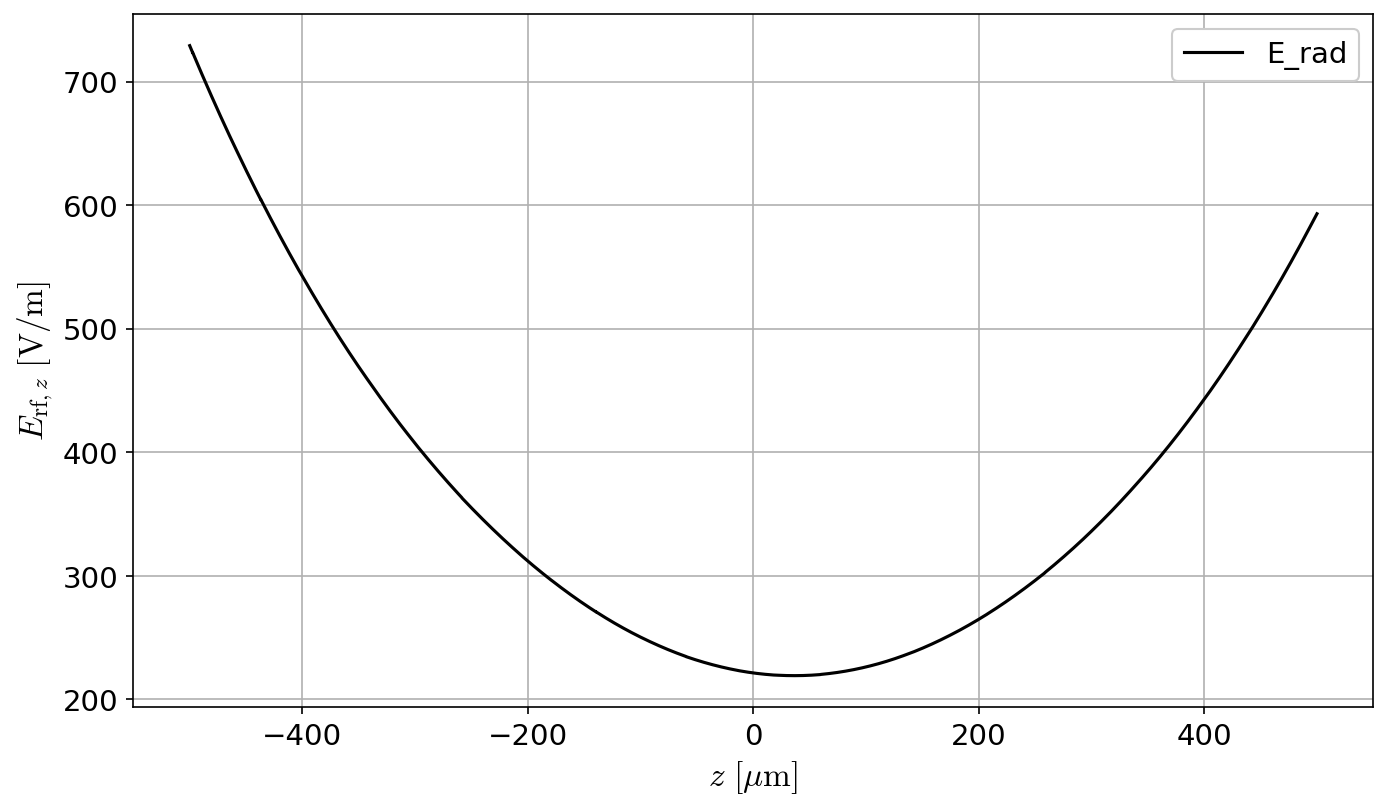

PyObject <matplotlib.legend.Legend object at 0x7f4d80dc7410>

In [34]:
# napeti a faze na elektrodach pasti
Vrf_x = 150
Vrf_y = -145
Vrf_5 = 40
Vrf_6 = 35
#Vrf = [Vrf_x, Vrf_y, Vrf_5, Vrf_6]

D_phi = 0
phi_5 = pi/2
phi_6 = 0
#phi = [D_phi, phi_5, phi_6];

E_rf_rad_complex = ( Vrf_y * exp( 0.5*D_phi* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 
E_rf_ax5_complex = Vrf_5 * exp( phi_5* 1im ) .* (- reverse(E_field_ax_data) ) # dle symetrie je E_5(z) = - E_6(-z); reverse by melo obratit smer osy z 
E_rf_ax6_comples = Vrf_6 * exp( phi_6* 1im ) .* E_field_ax_data

E_rf_complex = E_rf_rad_complex + E_rf_ax5_complex + E_rf_ax6_comples # superpozice generovanych poli, abychom dostali skutecne pole, je treba hodnoty vynasobit fazorem exp(Omega*t) a vzit realnou cast

E_rf_amp = sqrt.( E_rf_complex .* conj.(E_rf_complex) )
#E_rf_amp = abs.(E_rf_complex)
E_rf_phase = angle.(E_rf_complex)

#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")


line1 = x.plot(z_data[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
    E_rf_amp[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")
#line1 = x.plot(z_data*1e3,E_rf_amp, color="black", label="E_rad")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"E_{\rm{rf},\it{z}} \, \, \rm{[V/m]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

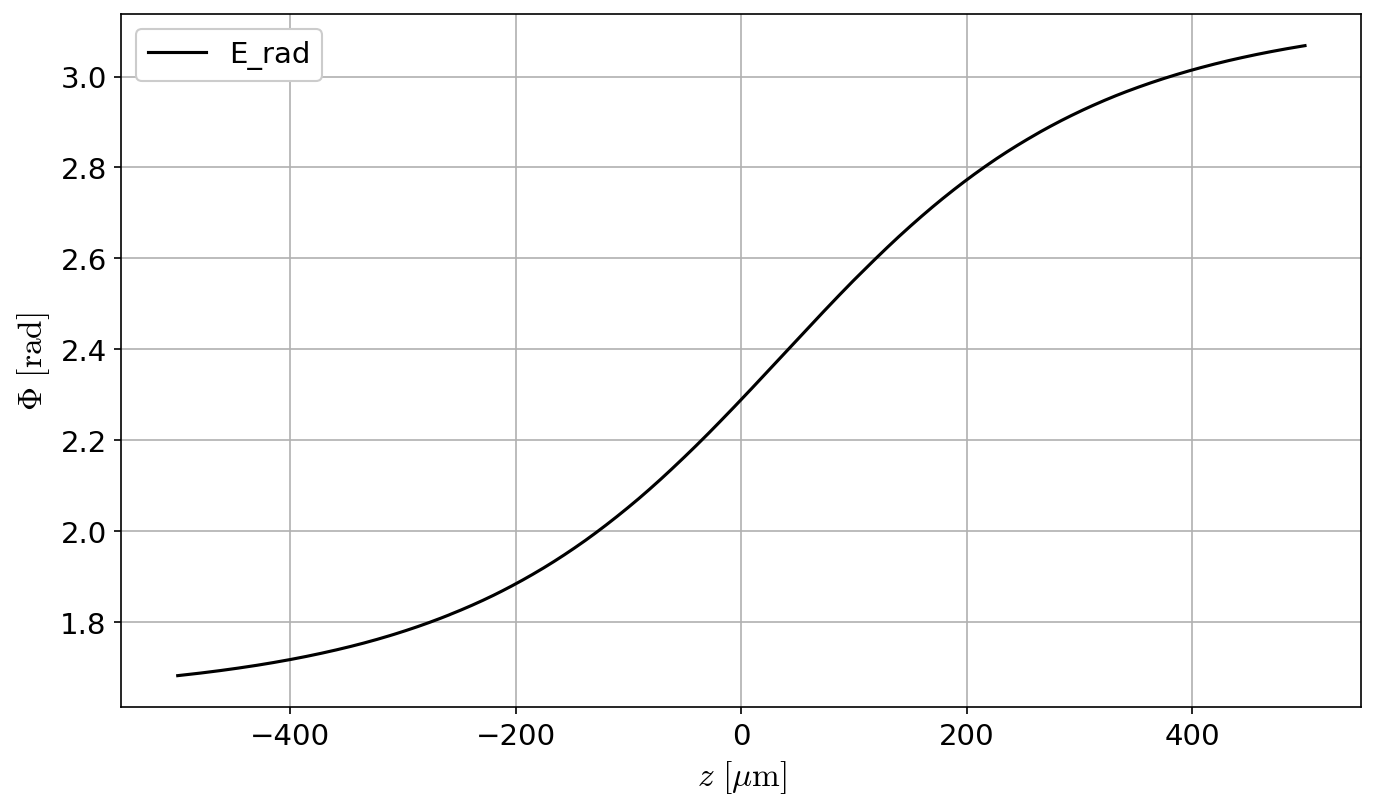

PyObject <matplotlib.legend.Legend object at 0x7f4d810f00d0>

In [35]:
figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x=gca()

#line1 = x.plot(z_data[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
#    E_rf_amp[convert(Int64,round(leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")


line1 = x.plot(z_data[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4))]*1e3,
    E_rf_phase[convert(Int64,round(1*leng_data/4)):convert(Int64,round(3*leng_data/4))], color="black", label="E_rad")
#line1 = x.plot(z_data*1e3,E_rf_amp, color="black", label="E_rad")

x.set_xlabel(L"z \,\, \rm{[\rm{\mu} m]}", fontsize=16)
x.set_ylabel(L"\Phi \, \, \rm{[rad]}", fontsize=16)

x.grid()
x.legend(framealpha=1)

Zkusim vykreslit zavislost na fazi buzeni jedne z radialnich elektrod

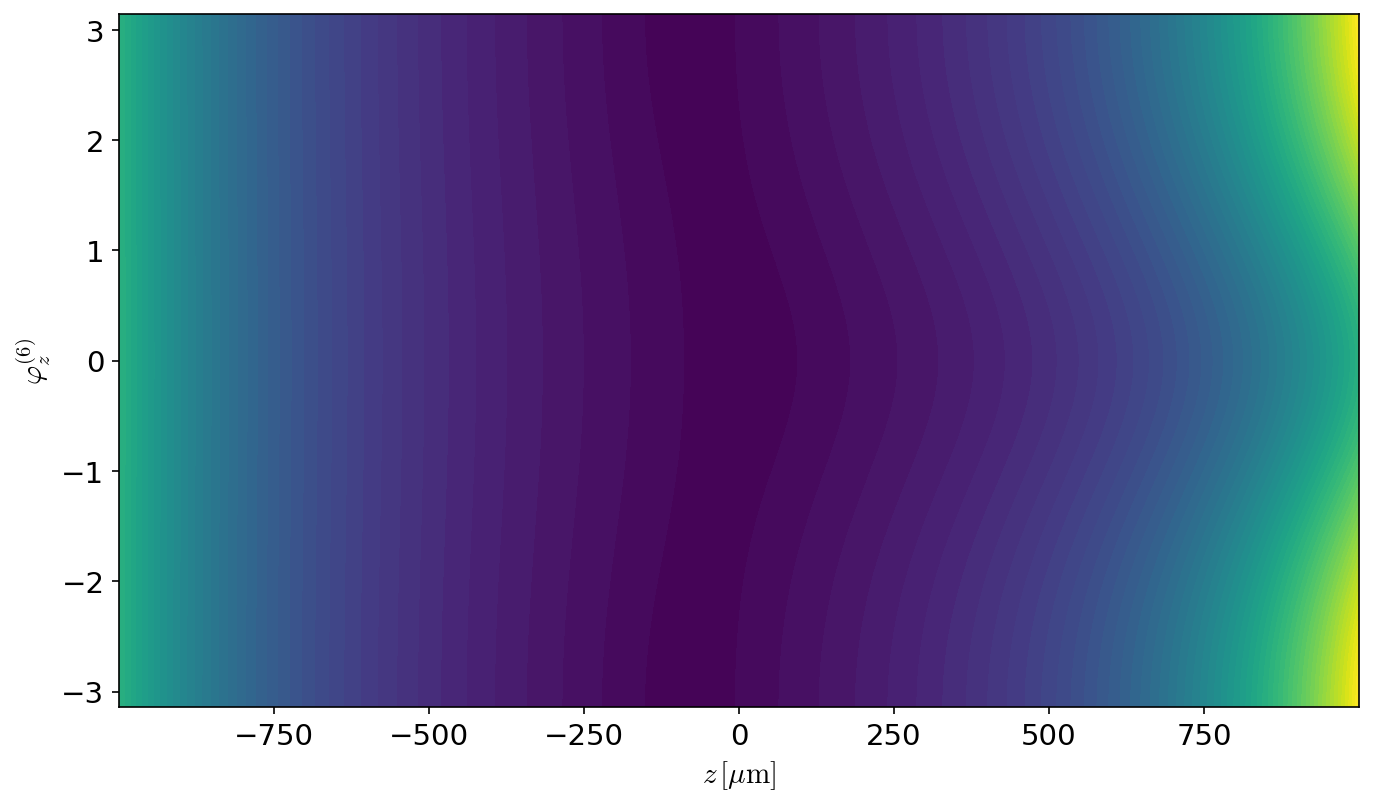

PyObject Text(53.00058593750003, 0.5, '$\\varphi_{z}^{(6)}$')

In [83]:
# napeti a faze na elektrodach pasti
Vrf_x = 0
Vrf_y = 350
Vrf_5 = 38
Vrf_6 = 40
#Vrf = [Vrf_x, Vrf_y, Vrf_5, Vrf_6]

D_phi = 0
phi_5 = 0
#phi_6 = pi
phi_6 = range(-pi, pi, length=200)
#phi = [D_phi, phi_5, phi_6];

E_rf_rad_complex = ( Vrf_y * exp( 0.5*D_phi* 1im ) + Vrf_x * exp( -0.5*D_phi* 1im ) ) .* E_field_rad_data 
E_rf_ax5_complex = Vrf_5 * exp( phi_5* 1im ) .* (- reverse(E_field_ax_data) ) # dle symetrie je E_5(z) = - E_6(-z); reverse by melo obratit smer osy z 
E_rf_ax6_comples = Vrf_6 * exp.( phi_6' * 1im ) .* E_field_ax_data

E_rf_complex = E_rf_rad_complex .+ E_rf_ax5_complex .+ E_rf_ax6_comples # superpozice generovanych poli, abychom dostali skutecne pole, je treba hodnoty vynasobit fazorem exp(Omega*t) a vzit realnou cast

E_rf_amp = sqrt.( E_rf_complex .* conj.(E_rf_complex) )
#E_rf_amp = abs.(E_rf_complex)

# colormap
#plot
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

contourf(z_data*1e3, Array(phi_6), E_rf_amp', 60)
xlabel(L"z \, \rm [\mu m]")
ylabel(L"\varphi_{z}^{(6)}")